In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
import pickle
import os
import sys
import copy

pp_path = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(pp_path)
os.environ["PYTHONPATH"] = pp_path + ":" + os.environ.get("PYTHONPATH", "")
from utils import *
pd.options.mode.chained_assignment = None # None / 'warn'
pd.set_option('display.max_columns', None)

In [2]:
### read dataset

# source: https://www.kaggle.com/datasets/uciml/mushroom-classification
datapath = '../data_raw/Mushroom/mushrooms.csv'
df = pd.read_csv(datapath)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
for f in df.columns.tolist():
    m, n = np.unique(df[f], return_counts=True)
    print(f, ':', m, n)

class : ['e' 'p'] [4208 3916]
cap-shape : ['b' 'c' 'f' 'k' 's' 'x'] [ 452    4 3152  828   32 3656]
cap-surface : ['f' 'g' 's' 'y'] [2320    4 2556 3244]
cap-color : ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y'] [ 168   44 1500 1840 2284  144   16   16 1040 1072]
bruises : ['f' 't'] [4748 3376]
odor : ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y'] [ 400  192 2160  400   36 3528  256  576  576]
gill-attachment : ['a' 'f'] [ 210 7914]
gill-spacing : ['c' 'w'] [6812 1312]
gill-size : ['b' 'n'] [5612 2512]
gill-color : ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y'] [1728   96  752  732  408 1048   64 1492   24  492 1202   86]
stalk-shape : ['e' 't'] [3516 4608]
stalk-root : ['?' 'b' 'c' 'e' 'r'] [2480 3776  556 1120  192]
stalk-surface-above-ring : ['f' 'k' 's' 'y'] [ 552 2372 5176   24]
stalk-surface-below-ring : ['f' 'k' 's' 'y'] [ 600 2304 4936  284]
stalk-color-above-ring : ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y'] [ 432   36   96  576  448  192 1872 4464    8]
stalk-color-below-ring : ['b' 'c' 'e' 

In [5]:
### preprocessing columns

df.rename(columns={"class":"Target"}, inplace=True)
df["Target"] = df["Target"].replace({'e':0, 'p':1})

df["cap-shape"] = df["cap-shape"].replace({'b':'other', 'c':'other', 's':'other'})
df["cap-surface"] = df["cap-surface"].replace({'f':'other', 'g':'other'})
df["cap-color"] = df["cap-color"].replace({'b':'other', 'c':'other', 'p':'other', 'r':'other', 'u':'other'})
df["odor"] = df["odor"].replace({'c':'other', 'm':'other'})
df["gill-color"] = df["gill-color"].replace({'e':'other', 'o':'other', 'r':'other', 'y':'other'})
df["stalk-root"] = df["stalk-root"].replace({'c':'other', 'r':'other'})
df["stalk-surface-above-ring"] = df["stalk-surface-above-ring"].replace({'f':'other', 'y':'other'})
df["stalk-color-above-ring"] = df["stalk-color-above-ring"].replace({'c':'other', 'e':'other', 'o':'other', 'y':'other'})
df["stalk-color-below-ring"] = df["stalk-color-below-ring"].replace({'c':'other', 'e':'other', 'o':'other', 'y':'other'})
df["veil-color"] = df["veil-color"].replace({'n':'other', 'o':'other', 'y':'other'})
df["ring-number"] = df["ring-number"].replace({'n':'other', 't':'other'})
df["ring-type"] = df["ring-type"].replace({'f':'other', 'l':'other', 'n':'other'})
df["spore-print-color"] = df["spore-print-color"].replace({'b':'other', 'o':'other', 'r':'other', 'u':'other', 'y':'other'})

df = df.drop(["veil-type"], axis=1)

to_dummy = []
to_le = []
for feature in list(OrderedSet(df.columns.to_list()) - OrderedSet(["Target"])):
    if len(np.unique(df[feature]))>2:
        to_dummy.append(feature)
    else:
        to_le.append(feature)
df = pd.get_dummies(df, prefix=to_dummy, columns=to_dummy, drop_first=True)
le = LabelEncoder()
df[to_le] = df[to_le].apply(lambda col: le.fit_transform(col))

print('\nduplicates: ', df.loc[df.duplicated()].shape)
df.drop_duplicates(inplace=True, ignore_index=True)

print('\ndata shape: ', df.shape, sep='')
print('\ncolumn names:\n', list(df.columns), sep='')
print('\nclass distribution:\n', df.Target.value_counts(), sep='')
print('\ncolumn types:\n', df.dtypes, sep='')


duplicates:  (260, 68)

data shape: (7864, 68)

column names:
['Target', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'veil-color', 'ring-number', 'cap-shape_k', 'cap-shape_other', 'cap-shape_x', 'cap-surface_s', 'cap-surface_y', 'cap-color_g', 'cap-color_n', 'cap-color_other', 'cap-color_w', 'cap-color_y', 'odor_f', 'odor_l', 'odor_n', 'odor_other', 'odor_p', 'odor_s', 'odor_y', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_other', 'gill-color_p', 'gill-color_u', 'gill-color_w', 'stalk-root_b', 'stalk-root_e', 'stalk-root_other', 'stalk-surface-above-ring_other', 'stalk-surface-above-ring_s', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_other', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 'stalk-color-below-ring_g', 'stalk-color-below-ring_n', 'stalk-color-below-ring_other', 'stalk-color-belo

In [6]:
df.describe(include='all')

,Target,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-color,ring-number,cap-shape_k,cap-shape_other,cap-shape_x,cap-surface_s,cap-surface_y,cap-color_g,cap-color_n,cap-color_other,cap-color_w,cap-color_y,odor_f,odor_l,odor_n,odor_other,odor_p,odor_s,odor_y,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_other,gill-color_p,gill-color_u,gill-color_w,stalk-root_b,stalk-root_e,stalk-root_other,stalk-surface-above-ring_other,stalk-surface-above-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_other,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_other,stalk-color-below-ring_p,stalk-color-below-ring_w,ring-type_other,ring-type_p,spore-print-color_k,spore-print-color_n,spore-print-color_other,spore-print-color_w,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000
mean,0.494405,0.418871,0.993642,0.166328,0.316887,0.585961,0.995168,0.070702,0.098169,0.054934,0.456256,0.299593,0.405010,0.233978,0.270092,0.037131,0.131994,0.136063,0.274669,0.050865,0.415565,0.028993,0.032553,0.073245,0.073245,0.094608,0.092574,0.051882,0.127162,0.015895,0.189217,0.062055,0.146872,0.475839,0.142421,0.094863,0.072991,0.625381,0.292981,0.596897,0.035860,0.073245,0.056968,0.018566,0.238047,0.558240,0.073245,0.065107,0.020600,0.238047,0.548067,0.173449,0.479908,0.238047,0.246185,0.014242,0.296033,0.026450,0.050865,0.158698,0.498983,0.216175,0.271617,0.084944,0.035605,0.144456,0.046796,0.018311
std,0.500000,0.493406,0.079489,0.372398,0.465293,0.492587,0.069350,0.256343,0.297562,0.227866,0.498114,0.458109,0.490925,0.423385,0.444035,0.189095,0.338506,0.342877,0.446376,0.219735,0.492850,0.167797,0.177476,0.260555,0.260555,0.292692,0.289853,0.221803,0.333175,0.125078,0.391706,0.241271,0.354001,0.499448,0.349504,0.293044,0.260138,0.484055,0.455159,0.490552,0.185952,0.260555,0.231797,0.134994,0.425915,0.496628,0.260555,0.246730,0.142051,0.425915,0.497716,0.378659,0.499628,0.425915,0.430815,0.118495,0.456535,0.160478,0.219735,0.365417,0.500031,0.411661,0.444822,0.278816,0.185316,0.351574,0.211214,0.134083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [7]:
continuous_features = [] ###
categorical_features = list(OrderedSet(df.columns.to_list()) - OrderedSet(["Target"]) - OrderedSet(continuous_features))
print('continuous_features:', continuous_features)
print('\ncategorical_features:', categorical_features)

continuous_features: []

categorical_features: ['bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'veil-color', 'ring-number', 'cap-shape_k', 'cap-shape_other', 'cap-shape_x', 'cap-surface_s', 'cap-surface_y', 'cap-color_g', 'cap-color_n', 'cap-color_other', 'cap-color_w', 'cap-color_y', 'odor_f', 'odor_l', 'odor_n', 'odor_other', 'odor_p', 'odor_s', 'odor_y', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_other', 'gill-color_p', 'gill-color_u', 'gill-color_w', 'stalk-root_b', 'stalk-root_e', 'stalk-root_other', 'stalk-surface-above-ring_other', 'stalk-surface-above-ring_s', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_other', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 'stalk-color-below-ring_g', 'stalk-color-below-ring_n', 'stalk-color-below-ring_other', 'stalk-color-below-ring_p', 'stalk-color-be

In [8]:
# shuffle and split data into train/(val)/test
seed = 0

train_fraction = 0.75 ###
df_train, df_test = shuffle_split_data(df, train_fraction, seed=seed)

print('train:', df_train.shape)
print(np.unique(df_train.Target, return_counts=True))
print('\ntest:', df_test.shape)
print(np.unique(df_test.Target, return_counts=True))

train: (5898, 68)
(array([0, 1]), array([2982, 2916]))

test: (1966, 68)
(array([0, 1]), array([994, 972]))


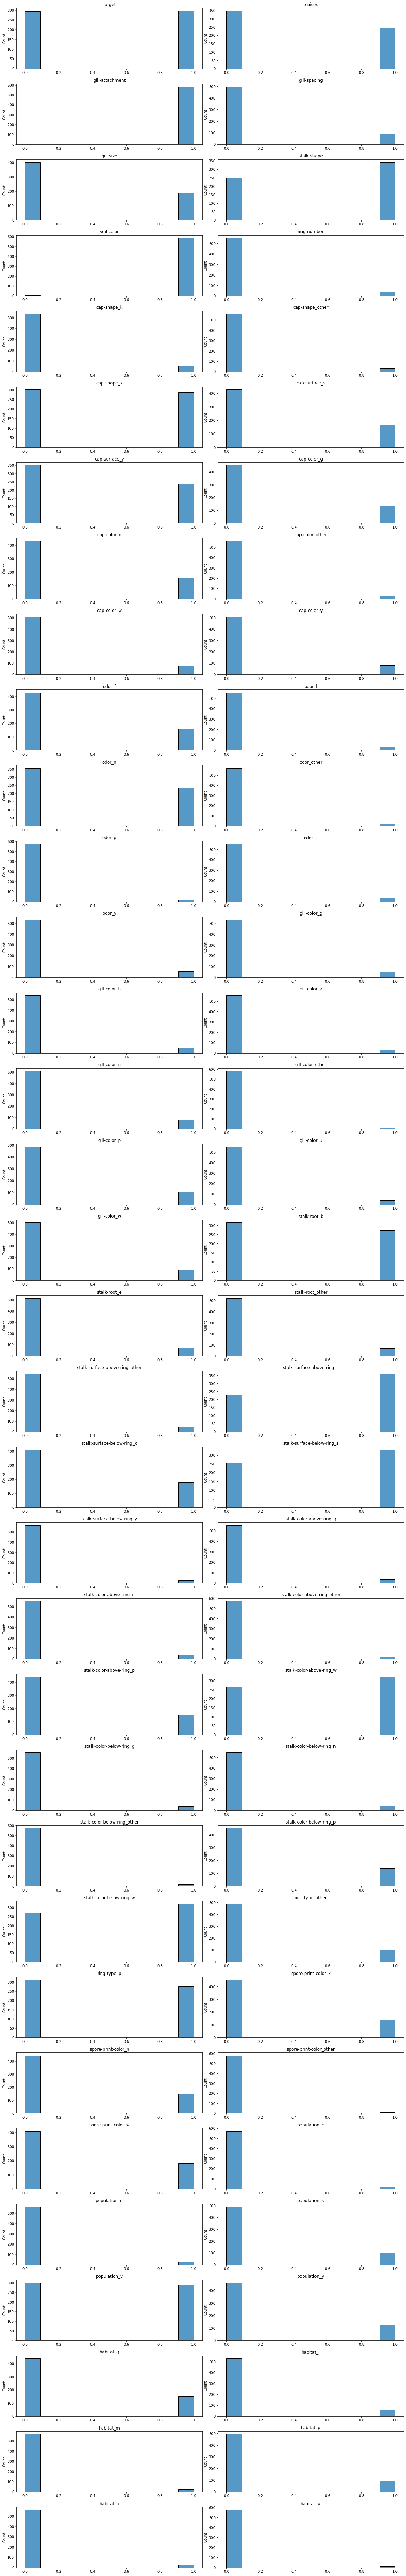

In [9]:
# plot histograms of the training data

ncol, nrow = 2, int(np.ceil(len(df_train.columns)/2))
figsize = (16,3*nrow)

plot_hist(df_train.sample(frac=0.1, random_state=0), figsize, nrow, ncol)

In [10]:
# scaling

scaler_list = [MinMaxScaler(clip=True), MinMaxScaler(clip=True)]   ### StandardScaler() / RobustScaler() / MinMaxScaler(clip=True)
feature_list = [continuous_features, categorical_features]
df_train_scaled, df_test_scaled = scale_features(df_train, df_test, feature_list, scaler_list)

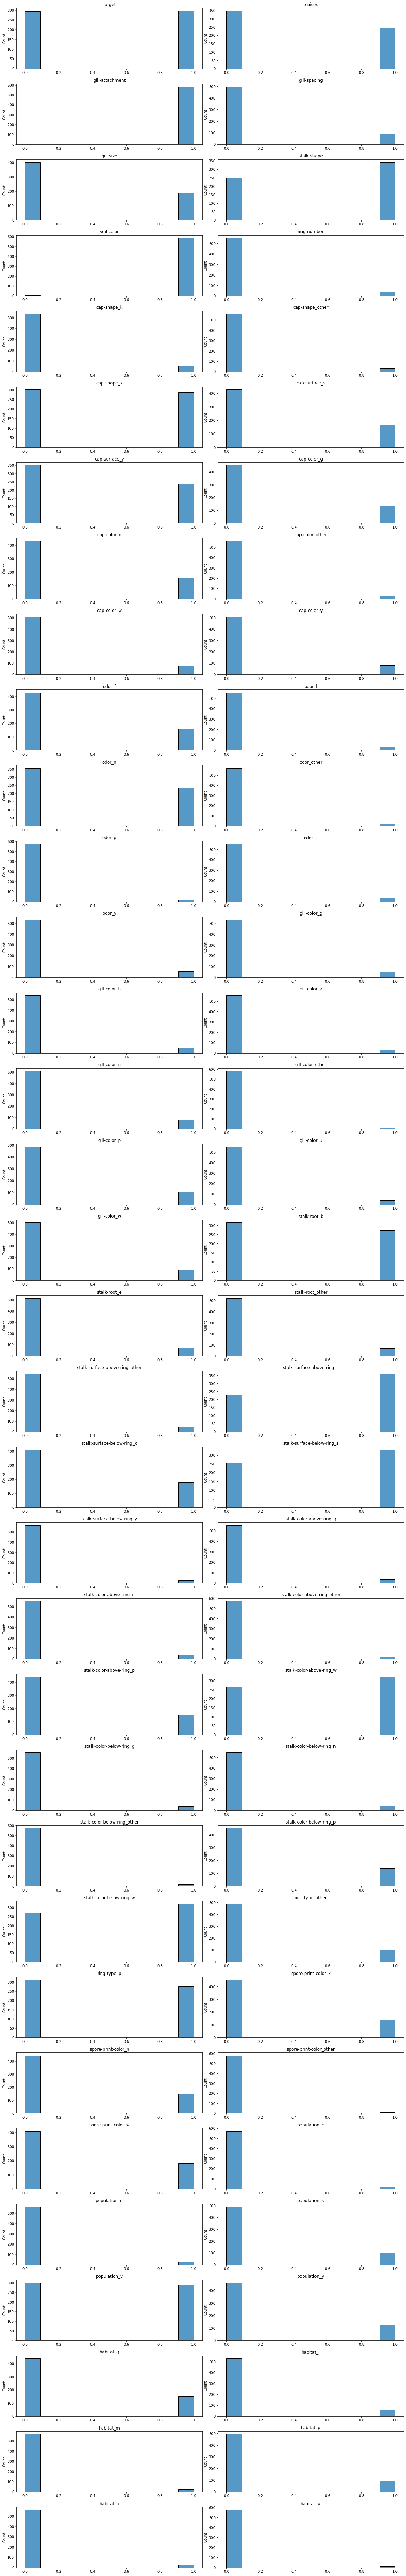

In [11]:
plot_hist(df_train_scaled.sample(frac=0.1, random_state=0), figsize, nrow, ncol)

In [12]:
df_train_scaled

,Target,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-color,ring-number,cap-shape_k,cap-shape_other,cap-shape_x,cap-surface_s,cap-surface_y,cap-color_g,cap-color_n,cap-color_other,cap-color_w,cap-color_y,odor_f,odor_l,odor_n,odor_other,odor_p,odor_s,odor_y,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_other,gill-color_p,gill-color_u,gill-color_w,stalk-root_b,stalk-root_e,stalk-root_other,stalk-surface-above-ring_other,stalk-surface-above-ring_s,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_other,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_other,stalk-color-below-ring_p,stalk-color-below-ring_w,ring-type_other,ring-type_p,spore-print-color_k,spore-print-color_n,spore-print-color_other,spore-print-color_w,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5894,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5895,0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5896,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
